In [2]:
import numpy as np
import matplotlib.pyplot as  plt
import os
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout,BatchNormalization,GlobalAveragePooling2D,Rescaling
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import imghdr

In [3]:
print("TensorFlow version:", tf.__version__)
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

TensorFlow version: 2.10.1
Num GPUs Available: 1


In [4]:
#Veri yolu
train_data= "C:/Users/levent/OneDrive/Masaüstü/archive/Training"

In [5]:
import glob as glob

In [6]:
#Belirttiğimiz data'nın dosya yolundaki dosyaları kontrol etme
datas2=glob.glob("C:/Users/levent/OneDrive/Masaüstü/archive/Training/*/*")

In [7]:
datas2

['C:/Users/levent/OneDrive/Masaüstü/archive/Training\\glioma_tumor\\gg (1).jpg',
 'C:/Users/levent/OneDrive/Masaüstü/archive/Training\\glioma_tumor\\gg (10).jpg',
 'C:/Users/levent/OneDrive/Masaüstü/archive/Training\\glioma_tumor\\gg (100).jpg',
 'C:/Users/levent/OneDrive/Masaüstü/archive/Training\\glioma_tumor\\gg (101).jpg',
 'C:/Users/levent/OneDrive/Masaüstü/archive/Training\\glioma_tumor\\gg (102).jpg',
 'C:/Users/levent/OneDrive/Masaüstü/archive/Training\\glioma_tumor\\gg (103).jpg',
 'C:/Users/levent/OneDrive/Masaüstü/archive/Training\\glioma_tumor\\gg (104).jpg',
 'C:/Users/levent/OneDrive/Masaüstü/archive/Training\\glioma_tumor\\gg (105).jpg',
 'C:/Users/levent/OneDrive/Masaüstü/archive/Training\\glioma_tumor\\gg (106).jpg',
 'C:/Users/levent/OneDrive/Masaüstü/archive/Training\\glioma_tumor\\gg (107).jpg',
 'C:/Users/levent/OneDrive/Masaüstü/archive/Training\\glioma_tumor\\gg (108).jpg',
 'C:/Users/levent/OneDrive/Masaüstü/archive/Training\\glioma_tumor\\gg (109).jpg',
 'C:/Us

In [8]:
print(os.path.exists(train_data))

True


In [9]:
#Veriler Tensorfloe dataset formaatında load edildi
#Tensorflow dataset kullanırken dosya yolunun tüm karakterlerinin ingilizce olmasına dikkat edilir.
Train_data = tf.keras.utils.image_dataset_from_directory(
    train_data,
    label_mode='int',
    image_size=(256, 256),
    batch_size=32
)


Found 2870 files belonging to 4 classes.


In [35]:
import tensorflow_datasets as tfds
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


In [34]:
! pip install tensorflow_datasets

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/5.3 MB ? eta -:--:--
   - -------------------------------------- 0.3/5.3 MB ? eta -:--:--
   ---------------------------------------  5.2/5.3 MB 21.3 MB/s eta 0:00:01
   ---------------------------------------  5.2/5.3 MB 21.3 MB/s eta 0:00:01
   ---------------------------------------- 5.3/5.3 MB 10.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/527.0 kB ? eta -:--:--
   ---------------------------------------- 527.0/527.0 kB 8.5 MB/s eta 0:00:00
  Created wheel for promise: filename=promise-2.3-py3-none-any.whl size=21613 sha256=4425f7d466177449652e4ec9ebc50fdefc0a4d05a2ac6a26953ec6ea5c42018e
  Stored in directory: c:\users\levent\appdata\local\pip\cache\wheels\54\4e\28\3ed0e1c8a752867445bab994d2340724928aa3ab059c57c8db
Successfully built promise
  Attempting uninstall: protobuf
    Found existing installation: proto

  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorboard 2.10.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 4.21.12 which is incompatible.
tensorflow 2.10.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 4.21.12 which is incompatible.

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
labels = []

for images, lbls in Train_data.unbatch():
    labels.append(int(lbls.numpy()))


In [38]:
df = pd.DataFrame(labels, columns=['label'])
label_counts = df['label'].value_counts().sort_index()

C:\Users\levent\AppData\Local\Temp\ipykernel_1360\4083207595.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


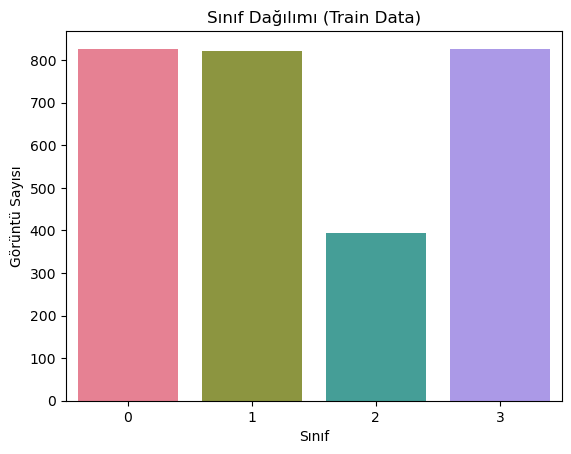

In [40]:
sns.barplot(
    x=label_counts.index,
    y=label_counts.values,
    palette=sns.color_palette("husl", len(label_counts))  # her sınıfa farklı renk
)
plt.xlabel("Sınıf")
plt.ylabel("Görüntü Sayısı")
plt.title("Sınıf Dağılımı (Train Data)")
plt.show()


In [10]:
len(Train_data)

90

In [11]:
train_data_len = int(len(Train_data)*0.7)
test_data_len = int(len(Train_data)*0.15)
val_data_len = int(len(Train_data)*0.15)


In [12]:
train_dataset = Train_data.take(train_data_len)
val_dataset = Train_data.skip(train_data_len).take(val_data_len)
test_dataset = Train_data.skip(train_data_len + val_data_len)

In [13]:
batch,labels=test_dataset.as_numpy_iterator().next()

In [14]:
labels

array([2, 3, 1, 0, 3, 1, 0, 0, 1, 2, 2, 1, 3, 0, 3, 0, 3, 1, 3, 3, 1, 0,
       1, 0, 1, 3, 0, 1, 2, 2, 1, 3])

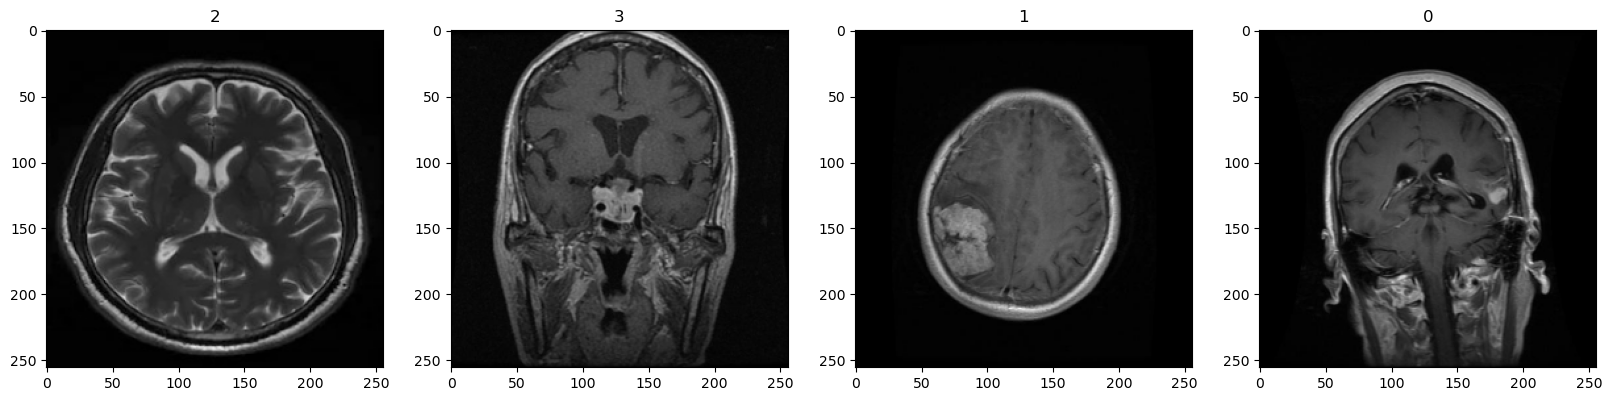

In [15]:
#sağlıksız-->1
#sağlıklı-->0
# lan ben hayatımda bukadar iğrenç görseller görmedim,başka proje bulamadınmı

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(labels[idx])

In [16]:
#verilerimizi belirli oranlarda "train" ve "test" formatında ayırmak için verimiz uzunluğunu kontrol ediyoruz
len(test_dataset)

15

In [17]:
tf.keras.backend.clear_session()

In [22]:

model=Sequential()
model.add(Conv2D(32, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(128, (3,3), 1, activation='relu'))
model.add(MaxPooling2D()) 
model.add(Conv2D(256, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(GlobalAveragePooling2D())

model.add(Dense(256, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 30, 30, 128)     

In [24]:
#modelimizin train işlemine başlanmadan önce optimizer ve metrik değerlerini "compile" ile atanmalı
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [25]:
eğitim = model.fit(train_dataset,
                   epochs=20,
                   validation_data=val_dataset)

Epoch 1/20
62/62 [==============================] - 13s 146ms/step - loss: 1.8933 - accuracy: 0.3095 - val_loss: 1.2887 - val_accuracy: 0.4471
Epoch 2/20
62/62 [==============================] - 9s 143ms/step - loss: 1.1927 - accuracy: 0.4738 - val_loss: 1.0564 - val_accuracy: 0.5769
Epoch 3/20
62/62 [==============================] - 9s 146ms/step - loss: 1.0041 - accuracy: 0.5842 - val_loss: 0.8799 - val_accuracy: 0.6635
Epoch 4/20
62/62 [==============================] - 9s 146ms/step - loss: 0.8659 - accuracy: 0.6593 - val_loss: 0.7809 - val_accuracy: 0.6683
Epoch 5/20
62/62 [==============================] - 9s 146ms/step - loss: 0.7588 - accuracy: 0.6986 - val_loss: 0.7055 - val_accuracy: 0.7236
Epoch 6/20
62/62 [==============================] - 9s 147ms/step - loss: 0.6613 - accuracy: 0.7465 - val_loss: 0.6683 - val_accuracy: 0.7332
Epoch 7/20
62/62 [==============================] - 9s 145ms/step - loss: 0.5993 - accuracy: 0.7722 - val_loss: 0.5725 - val_accuracy: 0.7764
Epoch

In [26]:
#modelimizin metriklerinin başarı oranlarının görüntülenmesi
başarı = model.evaluate(test_dataset)

15/15 [==============================] - 3s 83ms/step - loss: 0.5184 - accuracy: 0.8277


In [68]:
model.save('Haso_accuracy:0,8723.h5')

In [27]:
def plot_training_history(history):
    
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

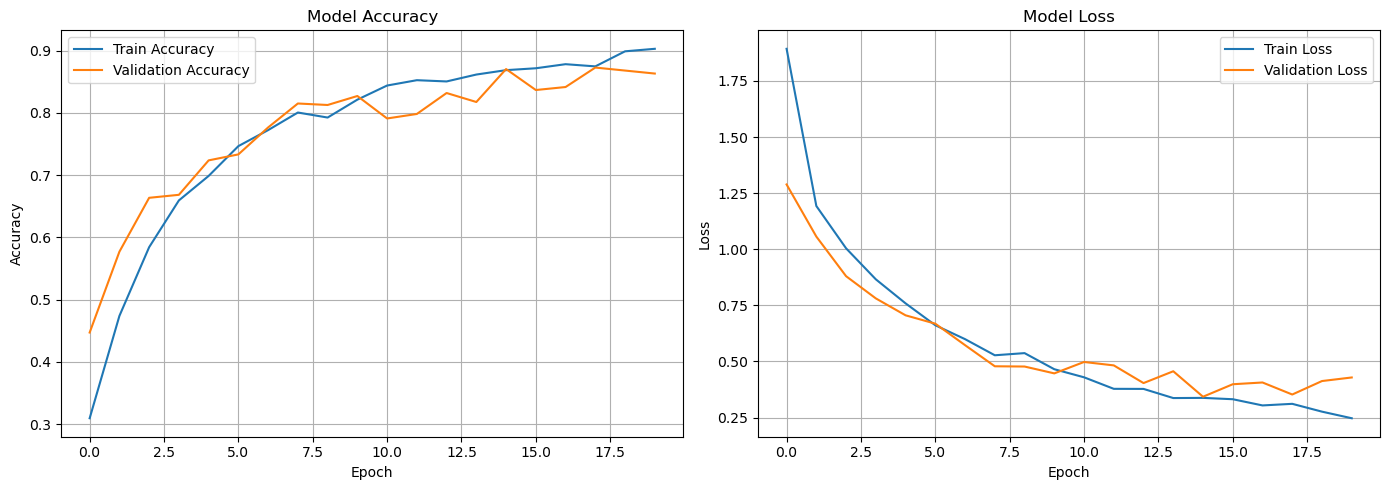

In [28]:
plot_training_history(eğitim)

In [29]:
from sklearn.metrics import confusion_matrix

1/1 [==============================] - 0s 69ms/step
Confusion Matrix:
[[114  28   0   5]
 [  2 100  16  11]
 [  0   5  55   1]
 [  0   3   1 129]]


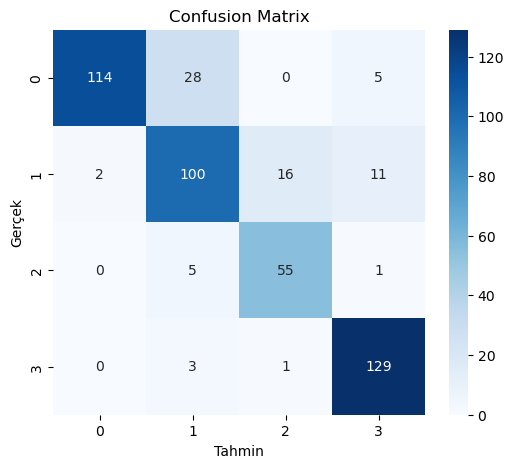

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_true = []
y_pred = []

for batch in test_dataset:  # Eğer batch (x, y) şeklindeyse
    x, y = batch
    preds = model.predict(x)

    # Sınıf indeksini al (one-hot veya softmax çıktıdan)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(y.numpy())  # eğer y one-hot encoded ise
    # Eğer y integer class label ise:
    # y_true.extend(y.numpy())

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

# Görselleştir
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[str(i) for i in range(4)],
            yticklabels=[str(i) for i in range(4)])
plt.xlabel('Tahmin')
plt.ylabel('Gerçek')
plt.title('Confusion Matrix')
plt.show()


In [90]:
model2=load_model('Haso_accuracy:0,8723.h5')

1/1 [==============================] - 0s 45ms/step


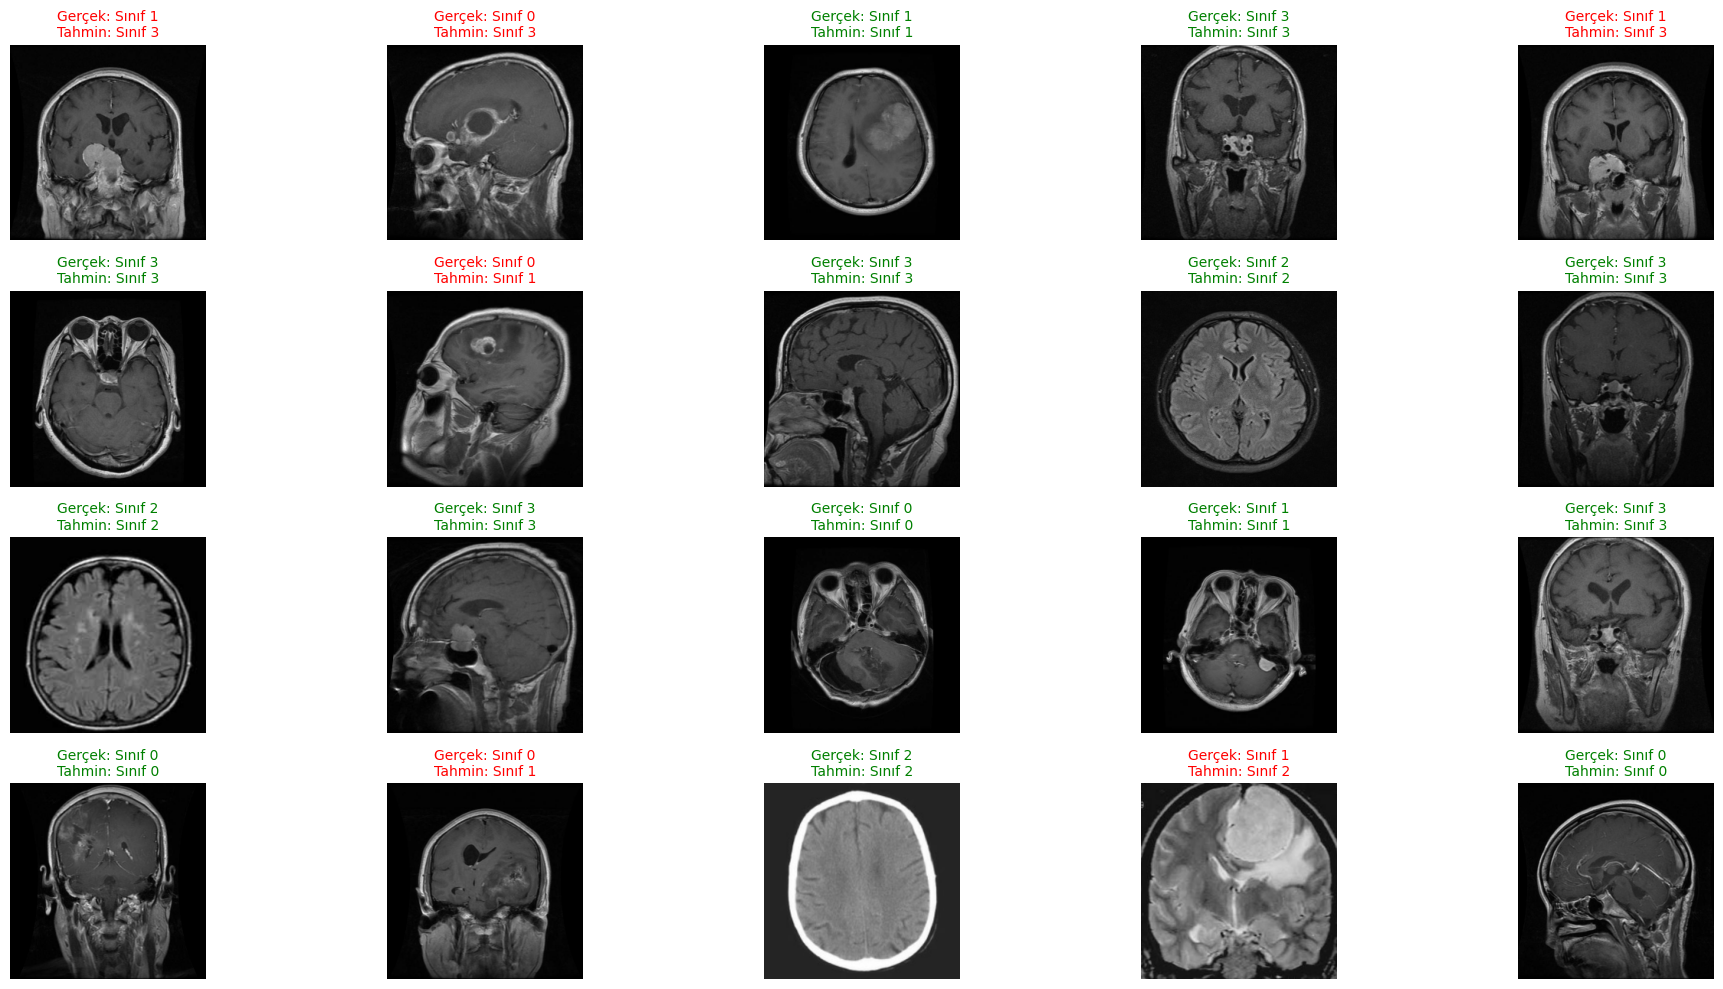

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Sınıf adlarını kendi sınıflarına göre düzenle
class_names = ['Sınıf 0', 'Sınıf 1', 'Sınıf 2', 'Sınıf 3']

# Görsel ve etiketleri toplayalım
images_list = []
true_labels = []
pred_labels = []

# İlk 20 örneği al
for images, labels in test_dataset:
    preds = model.predict(images)
    preds_classes = np.argmax(preds, axis=1)
    
    for i in range(len(images)):
        if len(images_list) < 20:
            images_list.append(images[i].numpy().astype("uint8"))
            true_labels.append(labels[i].numpy())
            pred_labels.append(preds_classes[i])
        else:
            break
    if len(images_list) >= 20:
        break

# Görselleri çiz
plt.figure(figsize=(20, 10))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(images_list[i])
    
    # Doğruysa yeşil, yanlışsa kırmızı
    if pred_labels[i] == true_labels[i]:
        color = 'green'
    else:
        color = 'red'
    
    plt.title(
        f"Gerçek: {class_names[true_labels[i]]}\nTahmin: {class_names[pred_labels[i]]}",
        color=color,
        fontsize=10
    )
    plt.axis('off')

plt.tight_layout()
plt.show()


In [41]:
model.save('Haso_accuracy8223.h5')